<a href="https://colab.research.google.com/github/iveksl2/ds_skills/blob/master/time_series/GrangerCausality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [Theory - ritvikmath](https://www.youtube.com/watch?v=b8hzDzGWyGM)
* [Granger Causility in Python: Data Science Code](https://www.youtube.com/watch?v=4TkNZviNJC0) <- This notebook is taken from here

In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
#build the time series, just a simple AR(1)
t1 = [0.1*np.random.normal()] # initialization
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())
print('First 5 elements: \n', t1[1:5])

First 5 elements: 
 [-0.05676970623235977, 0.04846412544452176, -0.0548566159514352, -0.08704137820262972]


In [8]:
np.random.normal()

-0.5649280045882853

In [10]:
# build the time series that is granger caused by t1
t2 = [item + 0.1*np.random.normal() for item in t1]

In [11]:
#adjust t1 and t2
t1 = t1[3:]
t2 = t2[:-3]

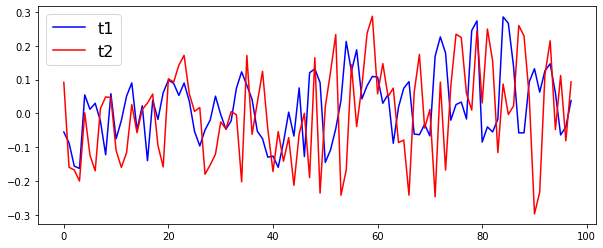

In [12]:
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

plt.legend(['t1', 't2'], fontsize=16)

In [16]:
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2,t1))
ts_df

,t2,t1
0,0.091722,-0.054857
1,-0.158942,-0.087041
2,-0.167017,-0.155488
3,-0.199668,-0.162387
4,0.001807,0.054955
...,...,...
93,0.214491,0.146576
94,-0.047640,0.061111
95,0.112001,-0.063505
96,-0.080673,-0.039571


In [17]:
gc_res = grangercausalitytests(ts_df, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8694  , p=0.0521  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=3.9929  , p=0.0457  , df=1
likelihood ratio test: chi2=3.9129  , p=0.0479  , df=1
parameter F test:         F=3.8694  , p=0.0521  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.3477  , p=0.0064  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=11.2831 , p=0.0035  , df=2
likelihood ratio test: chi2=10.6678 , p=0.0048  , df=2
parameter F test:         F=5.3477  , p=0.0064  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=32.9893 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=106.8404, p=0.0000  , df=3
likelihood ratio test: chi2=71.5920 , p=0.0000  , df=3
parameter F test:         F=32.9893 , p=0.0000  , df_denom=88, df_num=3
